<a href="https://colab.research.google.com/github/gabrielsuper/projetosdata/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do Covid-19 no Brasil

A Covid-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global.

O primeiro caso oficial de covid-19  foi de um [paciente hospitalizado no dia 12 de dezembro de 2019 em Wuhan, China](https://jornal.usp.br/artigos/covid2-o-que-se-sabe-sobre-a-origem-da-doenca/). Acredita-se que o vírus Sars-CoV-2 possua como hospedeiros determinadas espécies de morcegos e o pangolim, um animal consumido como alimento exótico em algumas regiões da China.

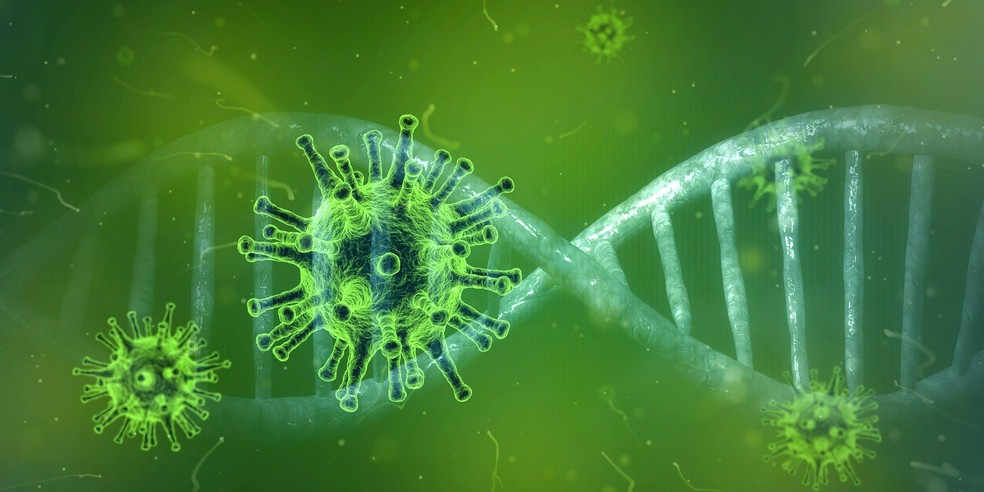

O paciente acometido pelo Covid-19 apresenta, quando sintomático, os seguintes sintomas:Tosse: 65-80%, Febre: 45-85%,  Dispneia: 30-40%, Sintomas gastrointestinais: 10%.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.


## Obtenção dos Dados

Os dados obtidos foram extrídos da *[Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data)*. Esse dataset é composto de diversas instituições oficiais como JHU, OMS, ECDC,entre outras.

Dados como vacinação, mortes e casos é atualizado diariamente, já informações como testes e UTI são atualizados semanalmente. 

Apesar de termos bastantes dados, por se tratar de uma doença nova, existe bastante dificuldade em ter informações atualizadas em tempo real, bem como dados assertivos entre os governos federais, estaduais e municipais.

### Importando os dados de Covid-19

Vamos utilizar a biblioteca pandas para realizar a importação do arquivo em formato CSV que encontra-se neste [link](https://github.com/owid/covid-19-data/tree/master/public/data). Utilizando o comando ***pd.read_csv("link_do_arquivo")***

In [27]:
# importar as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset Covid-19 para um dataframe

df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

## Análise Exploratória dos Dados

Nessa etapa iremos realizar algumas verificações estatísticas referente ao nosso dataframe como quantidade de entradas e variavéis, primeiras entradas e dados ausentes.


In [28]:
# verificando as dimensoes

print("Dimensões do Dataset:",
    "\nA quantidade de entradas são:", df.shape[0], "\n"
    "A quantidade de variáveis são:",df.shape[1])

Dimensões do Dataset: 
A quantidade de entradas são: 98011 
A quantidade de variáveis são: 60


In [29]:
# verificando as 5 primeiras entradas

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [30]:
# extrair o nome das colunas

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Uma das etapas importantes quando vamos realizar a manipulação dos dados é verificar os tipos das variáveis, faremos isso utilizando a função ***dtypes***.

In [31]:
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Outro passo importante é verificar a quantidade de dados ausentes no nosso dataframe e entender não só a quantidade como o motivo destes dados estarem faltando.

Para isso, é importante verificar a fonte dos dados, entender a coleta deles, verificar a aleatoriedade dessa ausência, etc.

In [32]:
# verificar dados ausentes

round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

weekly_icu_admissions                    0.99
weekly_icu_admissions_per_million        0.99
weekly_hosp_admissions                   0.98
weekly_hosp_admissions_per_million       0.98
excess_mortality                         0.96
icu_patients                             0.90
icu_patients_per_million                 0.90
people_fully_vaccinated_per_hundred      0.88
people_fully_vaccinated                  0.88
hosp_patients                            0.87
hosp_patients_per_million                0.87
new_vaccinations                         0.87
people_vaccinated                        0.85
people_vaccinated_per_hundred            0.85
total_vaccinations_per_hundred           0.84
total_vaccinations                       0.84
new_vaccinations_smoothed_per_million    0.72
new_vaccinations_smoothed                0.72
total_tests                              0.55
total_tests_per_thousand                 0.55
handwashing_facilities                   0.55
new_tests_per_thousand            

As colunas que estão com dados em percentual muito alto pode está ocorrendo pela taxa de atualização ser muito alta, não dando tempo para ao extrair obter esses resultados atualizados.

Como foi observado a coluna date está em formato object o que atrapalha algumas analises por se tratar de uma variável que possui dimensão de tempo (data), logo iremos precisar tranformar.

In [33]:
df.date = pd.to_datetime(df.date)

Agora que transformamos a coluna date de objeto para data, vamos analisar o país com maiores casos de morte até o momento atual. Para isso vamos consultar a data mais recente.

In [34]:
# verificando a data mais recente do nosso dataset

df.date.max()



Timestamp('2021-06-25 00:00:00')

In [35]:
# total de casos

df.loc[df.date == '2021-06-19'].sort_values(by="total_cases", ascending=False).head(10)



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
96638,OWID_WRL,NaN,World,2021-06-19,178188440.0,347447.0,361053.000,3859623.0,8070.0,9208.571,22859.915,44.574,46.320,495.154,1.035,1.181,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.626814e+09,1.689525e+09,773180069.0,35768096.0,37717239.0,33.70,21.68,9.92,4839.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,NaN
5127,OWID_ASI,NaN,Asia,2021-06-19,54332668.0,123451.0,135681.571,763319.0,2589.0,3492.857,11710.012,26.607,29.243,164.514,0.558,0.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.551525e+09,1.012983e+09,353769249.0,27286520.0,27387493.0,33.44,21.83,7.62,5903.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29982,OWID_EUR,NaN,Europe,2021-06-19,47703194.0,39480.0,39642.286,1094535.0,806.0,898.000,63716.394,52.733,52.950,1461.953,1.077,1.199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.535601e+08,2.847254e+08,177616920.0,3339922.0,4790187.0,60.58,38.03,23.72,6398.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65259,OWID_NAM,NaN,North America,2021-06-19,39404442.0,17547.0,23147.429,895380.0,346.0,550.429,66553.440,29.637,39.096,1512.282,0.584,0.930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.099165e+08,2.423926e+08,178807637.0,2175623.0,2548162.0,69.23,40.94,30.20,4304.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93401,USA,North America,United States,2021-06-19,33537995.0,8520.0,11538.143,601741.0,170.0,285.857,101322.437,25.740,34.858,1817.934,0.514,0.864,0.87,3717.0,11.230,12657.0,38.238,NaN,NaN,NaN,NaN,412129.0,463199056.0,1399.382,1.245,603239.0,1.822,0.018,55.6,tests performed,3.171178e+08,1.767371e+08,149125164.0,1069021.0,1286438.0,94.82,52.85,44.59,3847.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN
30501,OWID_EUN,NaN,European Union,2021-06-19,32593947.0,9639.0,13329.857,735783.0,265.0,390.143,73258.149,21.665,29.960,1653.746,0.596,0.877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.223753e+08,2.086191e+08,122533586.0,2223805.0,3807161.0,72.46,46.89,27.54,8557.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81970,OWID_SAM,NaN,South America,2021-06-19,31517079.0,143147.0,140437.714,968177.0,3907.0,3881.429,73166.254,332.313,326.023,2247.603,9.070,9.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.586225e+08,1.104893e+08,48351664.0,2689294.0,2416162.0,36.82,25.65,11.22,5609.0,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41038,IND,Asia,India,2021-06-19,29881772.0,58226.0,63111.857,386708.0,1571.0,2332.000,216

Pudemos verificar que os países líderes em casos aos 19 de Junho de 2021 eram:

*   Estados Unidos: 33.537.995 casos
*   India: 29.881.772 casos
*   Brasil: 17.883.750 casos

Agora vamos verificar os casos de mortes.



In [36]:
# total de mortes

df.loc[df.date == '2021-06-19'].sort_values(by="total_deaths", ascending=False).head(10)



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
96638,OWID_WRL,NaN,World,2021-06-19,178188440.0,347447.0,361053.000,3859623.0,8070.0,9208.571,22859.915,44.574,46.320,495.154,1.035,1.181,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.626814e+09,1.689525e+09,773180069.0,35768096.0,37717239.0,33.70,21.68,9.92,4839.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
29982,OWID_EUR,NaN,Europe,2021-06-19,47703194.0,39480.0,39642.286,1094535.0,806.0,898.000,63716.394,52.733,52.950,1461.953,1.077,1.199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.535601e+08,2.847254e+08,177616920.0,3339922.0,4790187.0,60.58,38.03,23.72,6398.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81970,OWID_SAM,NaN,South America,2021-06-19,31517079.0,143147.0,140437.714,968177.0,3907.0,3881.429,73166.254,332.313,326.023,2247.603,9.070,9.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.586225e+08,1.104893e+08,48351664.0,2689294.0,2416162.0,36.82,25.65,11.22,5609.0,NaN,4.307598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65259,OWID_NAM,NaN,North America,2021-06-19,39404442.0,17547.0,23147.429,895380.0,346.0,550.429,66553.440,29.637,39.096,1512.282,0.584,0.930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.099165e+08,2.423926e+08,178807637.0,2175623.0,2548162.0,69.23,40.94,30.20,4304.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5127,OWID_ASI,NaN,Asia,2021-06-19,54332668.0,123451.0,135681.571,763319.0,2589.0,3492.857,11710.012,26.607,29.243,164.514,0.558,0.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.551525e+09,1.012983e+09,353769249.0,27286520.0,27387493.0,33.44,21.83,7.62,5903.0,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30501,OWID_EUN,NaN,European Union,2021-06-19,32593947.0,9639.0,13329.857,735783.0,265.0,390.143,73258.149,21.665,29.960,1653.746,0.596,0.877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.223753e+08,2.086191e+08,122533586.0,2223805.0,3807161.0,72.46,46.89,27.54,8557.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93401,USA,North America,United States,2021-06-19,33537995.0,8520.0,11538.143,601741.0,170.0,285.857,101322.437,25.740,34.858,1817.934,0.514,0.864,0.87,3717.0,11.23,12657.0,38.238,NaN,NaN,NaN,NaN,412129.0,463199056.0,1399.382,1.245,603239.0,1.822,0.018,55.6,tests performed,3.171178e+08,1.767371e+08,149125164.0,1069021.0,1286438.0,94.82,52.85,44.59,3847.0,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,NaN
12940,BRA,South America,Brazil,2021-06-19,17883750.0,82288.0,72704.571,500800.0,2301.0,20

Em relação as mortes os países que lideravam até o dia 19 de Junho de 2021 são:

* Estados Unidos: 601.741 mortes
* Brasil: 500.800 mortes
* India: 386.708 mortes

Para melhorar a visualização e a compreensão dos dados, vamos plotar um gráfico.

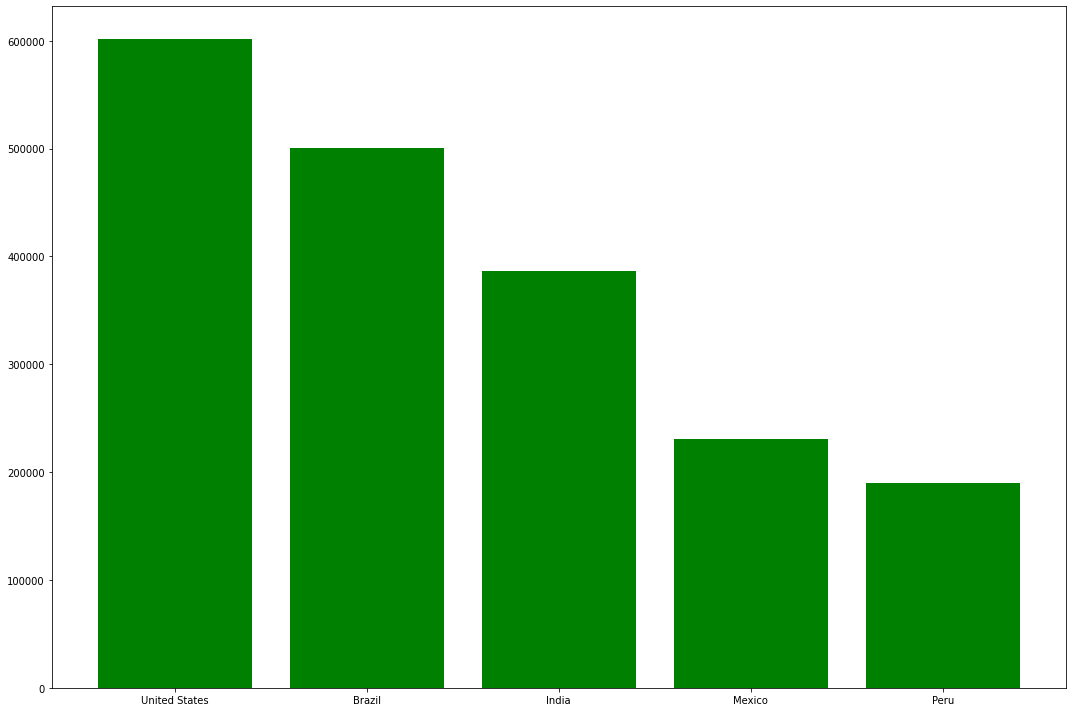

In [37]:
# gráfico de barras para total de mortes

top_5_total_deaths = df.loc[df.date == '2021-06-19',['location','total_deaths']].sort_values(by='total_deaths',ascending=False)[6:11]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location','total_deaths',data=top_5_total_deaths,color='Green')

fig.tight_layout()

### Como o vírus vem evoluindo até então?

Uma das preocupações desde o início da pandemia é entender a evolução dos casos de mortes provocados pelo vírus.

Uma das melhores formas de observamos esses casos é plotando um gráfico de linhas. Por esse motivo vamos plotar um gráfico de linhas para demonstrar a evolução de mortes no mundo.

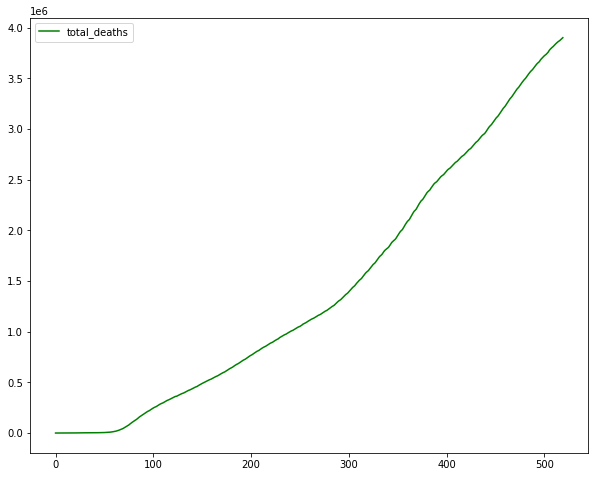

In [38]:
df.loc[df.location == "World" ,'total_deaths'].reset_index(drop=True).plot(kind='line',figsize=(10,8),legend=True,color="green");

No eixo X temos a quantidade de dias da pandemia e no eixo y o valor de mortes já chegando na quantidade perto dos 4 milhões de mortes em todo o mundo.

In [39]:
# máximo de mortes no mundo

df.loc[df.location == "World" ,'total_deaths'].max()

3900372.0

In [40]:
# top 5 países com mortes

top_5_total_deaths

,location,total_deaths
93401,United States,601741.0
12940,Brazil,500800.0
41038,India,386708.0
57566,Mexico,230959.0
70277,Peru,189933.0


In [41]:
# percentual de mortes do top 5 pelo resto do mundo

round(df.loc[df.date == '2021-06-19',['total_deaths']].sort_values(by='total_deaths',ascending=False)[6:11].sum() / df.loc[df.location == "World" ,'total_deaths'].max(),2)

total_deaths    0.49
dtype: float64

Se analisarmos a quantidade do top 5 deaths com a quantidade de mortes até o dia 19/06/2021 com todo o mundo chegaremos ao percentual de 49% dos casos.

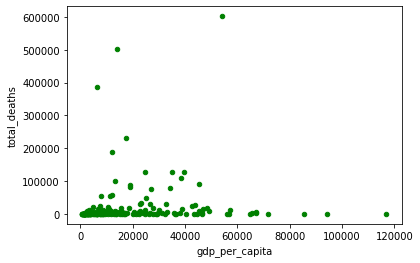

In [42]:
# total de mortes por PIB dos países até o dia 19/06/2021

df_clean = df.dropna(subset=['continent'],axis=0)

gdr_graf = pd.DataFrame(data=df_clean)

gdr_graf.loc[gdr_graf.date=='2021-06-19'].plot(x='gdp_per_capita',y='total_deaths',kind='scatter',color='green');

É importante lembrar que nada é conclusivo, pois envolve fatores como proporcão de testes, entre outros fatores.

### Analisando a situação de Covid-19 no Brasil

Depois de vermos a situação do Covid em todo mundo, vamos fazer algumas analises com o foco no Brasil.

Vamos extrair um dataframe somente contendo dados do Brasil.

In [51]:
#criar uma cópia do dataframe somente com o Brasil

df_brasil = df.loc[df.location == 'Brazil'].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
12461,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12462,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12463,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
12464,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
12465,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


In [67]:
print(df_brasil.date.min())
print(df_brasil.date.max())

2020-02-26 00:00:00
2021-06-24 00:00:00


Podemos ver que nosso dataframe possui datas que vão desde **26-02-2020** até **24-06-2021.**

Ao usar o comanda max na coluna date identificamos que a maior data que temos no nosso dataframe é até o dia 24/06/2021, entretanto como temos alguns delays na atualização e o artigo começou a ser produzido na data 19/06/2021, vamos utilizar nossos dados até a data 19/06/2021.

Vamos verificar agora qual foi a primeira data de morte registrada no Brasil

In [86]:
#primeira morte no Brasil

df_brasil.loc[df_brasil['new_deaths'] != 0.0].sort_values(by='new_deaths').head(1)
print('A primeira morte foi registrada em {}'.format(df_brasil.date.loc[12481]))

A primeira morte foi registrada em 2020-03-17 00:00:00


In [85]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# identificação do primeiro caso

df_brasil.loc[df_brasil['new_cases'] != 0.0].sort_values(by='new_cases').head(1)
print("O primeiro caso registrado de Covid-19 no Brasil foi na data: {}".format(df_brasil.date.loc[12461]))

O primeiro caso registrado de Covid-19 no Brasil foi na data: 2020-02-26 00:00:00


Agora vamos identificar quanto tempo levou desde o primeiro caso até a morte

In [95]:
#importando a biblioteca datetime
from datetime import date

delta = df_brasil.date.loc[12481] - df_brasil.date.loc[12461]

print("Se passaram {} dias desde o primeiro caso até a primeira morte no Brasil".format(delta.days))

Se passaram 20 dias desde o primeiro caso até a primeira morte no Brasil


Para firnalizarmos nossa análise no Brasil vamos plotar gráficos de linhas para acompanharmos os casos de evolução de mortes.

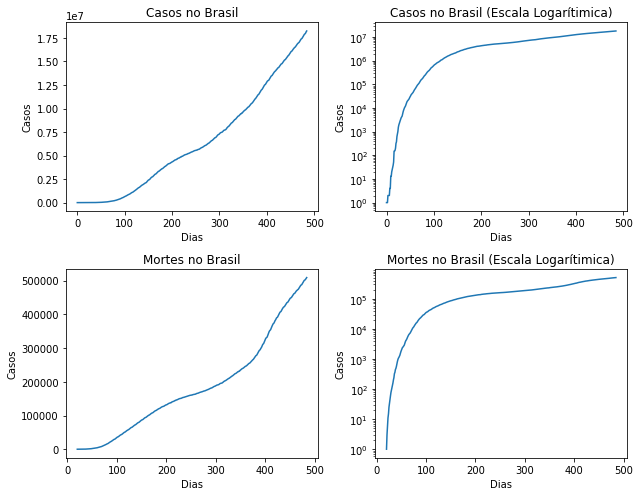

In [117]:
#plotar gráficos de linha em escalas linear e logarítmica para os casos totais e de mortes totais

x= list(range(485))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize=(9,7),nrows=2,ncols=2)

ax1.set_title('Casos no Brasil')
ax1.set_xlabel("Dias")
ax1.set_ylabel("Casos")
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala Logarítimica)')
ax2.set_xlabel("Dias")
ax2.set_ylabel("Casos")
ax2.set_yscale('log')
ax2.plot(x, z)


ax3.set_title('Mortes no Brasil')
ax3.set_xlabel("Dias")
ax3.set_ylabel("Casos")
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala Logarítimica)')
ax4.set_xlabel("Dias")
ax4.set_ylabel("Casos")
ax4.set_yscale('log')
ax4.plot(x, z2)

plt.tight_layout()

## Conclusão

Uma observação muito importante a se fazer sobre esse dataset é que ele é atualizado diariamente, logo os dados apresentados ficaram desatualizados brevemente. Por isso brevemente aparecerá novos resultados caso consulte os dados novamente.

Entretanto, levando em consideração o contexto dos dados analisados, vale a pena destacar que:

* O covid-19 é um vírus que contém  alto grau de transmissão, por isso a variável new_cases aumenta consideravelmente.

* Os Estados Unidos é o país com maiores casos, seguido de maiores índices de mortes, logo após vem o Brasil e por último a Índia.

* O Brasil passou das 500 mil mortes.

* No geral os casos entre estes top 3 países os indices são bastantes altos.

Diversas outras análises podem ocorrer dentro desse dataset (conjunto de dados),entretanto com essa análise inicial já conseguimos ter uma visão e noção de como o vírus está se comportando ainda nos países.
